In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
print(len(df[df.duplicated()]))

24


In [ ]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

None

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
import math

df['Age'] = df['Age'].apply(lambda x: math.floor(x))
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# INI TESTING

# import matplotlib.pyplot as plt
# import numpy as np

# # display(df)
# numeric_df = df.select_dtypes(include=['float64', 'int64'])

# num_columns = numeric_df.shape[1]

# # df['col1'] = np.log(df['col1'])

# # df = df[numeric_df.columns].apply(lambda x: np.log(x))

# fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5 * num_columns))

# if num_columns == 1:
#     axes = [axes]

# for i, column in enumerate(numeric_df.columns):
#     df[column] = np.log1p(df[column])
#     axes[i].hist(numeric_df[column], bins=30, edgecolor='black')
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')

# plt.tight_layout()

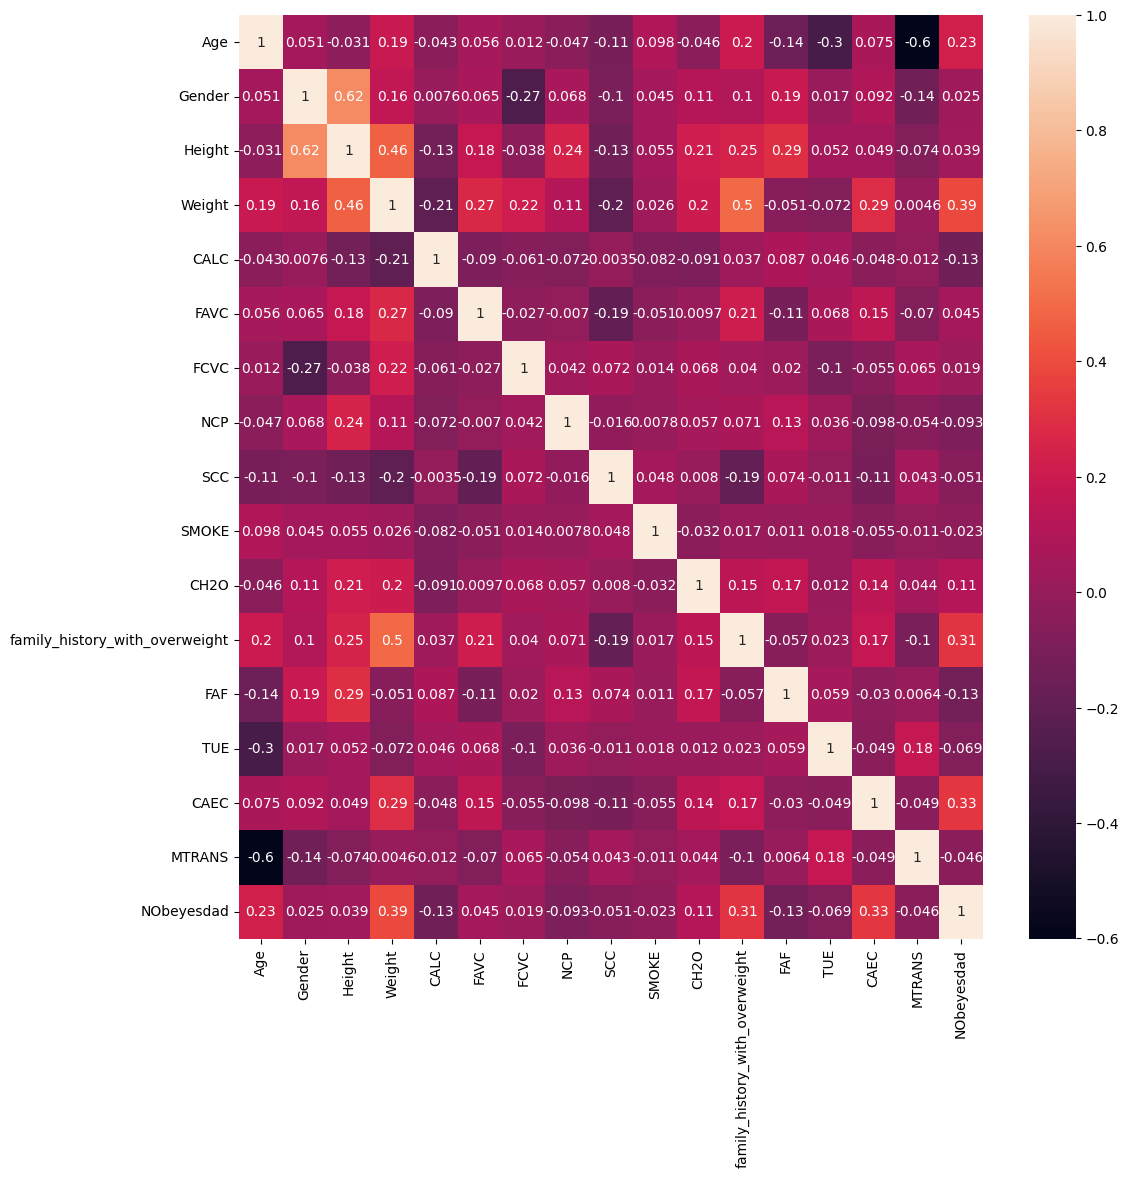

In [ ]:
categorical_df = df.select_dtypes(include=['object', 'category'])
cols = categorical_df.columns
label_encoder = LabelEncoder()

corr_df = df.copy()

for i in cols:
  corr_df[i] =label_encoder.fit_transform(corr_df[i])

plt.figure(figsize=(12, 12))
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
display(df['MTRANS'].value_counts())

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [ ]:
duplicated_index = df[df.duplicated()].index
df.drop(duplicated_index,inplace=True)

In [ ]:
df.drop(['Gender','MTRANS'],axis=1,inplace=True)

In [ ]:
numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_cols = numeric_df.columns
numeric_cols
# display(numeric_df)
for i in numeric_cols:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3-q1
  low = q1 - iqr*1.5
  high = q3 + iqr*1.5
  print("==================")
  print(i)
  lowCount = df.loc[df[i] < low,i].count()
  highCount = df.loc[df[i] > high,i].count()
  # print(df.loc[df[i] < low,i].index)
  # print(df.loc[df[i] > high,i].index)
  print('low bound', lowCount)
  print('high bound',highCount)
  print('total', lowCount + highCount)

  # print(df[])


Age
low bound 0
high bound 147
total 147
Height
low bound 0
high bound 1
total 1
Weight
low bound 0
high bound 1
total 1
FCVC
low bound 0
high bound 0
total 0
NCP
low bound 423
high bound 154
total 577
CH2O
low bound 0
high bound 0
total 0
FAF
low bound 0
high bound 0
total 0
TUE
low bound 0
high bound 0
total 0


In [ ]:
for col in ['Height', 'Weight']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    high = q3 + iqr * 1.5

    outliers_index = df[df[col] > high].index

    df = df.drop(outliers_index)

In [ ]:
# hehe

# df['NCP'] = winsorize(df['NCP'], limits=[0.05, 0.05])
# # df['NCP'].
# df.loc[df['NCP'] >= 3.7508809999999997,'NCP']

q1 = df['NCP'].quantile(0.25)
q3 = df['NCP'].quantile(0.75)
iqr = q3-q1
low = q1 - iqr*1.5
high = q3 + iqr*1.5

condition = (df['NCP'] >= low) & (df['NCP'] <= high)
no_outlier_mean = df.loc[condition,'NCP'].mean()
print(no_outlier_mean)

df.loc[~condition,'NCP'] = no_outlier_mean
df.loc[~condition,'NCP']


2.9678842970822283


4       2.967884
14      2.967884
16      2.967884
17      2.967884
18      2.967884
          ...   
1794    2.967884
1795    2.967884
1796    2.967884
1797    2.967884
1798    2.967884
Name: NCP, Length: 577, dtype: float64

In [ ]:
standard_scaler = StandardScaler()

numeric_df = df.select_dtypes(include=['float64','int64'])
numeric_cols = numeric_df.columns

df[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])
df

,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad
0,-0.475918,-0.887270,-0.873005,no,no,-0.788184,0.256053,no,no,-0.007030,yes,-1.186241,0.554559,Sometimes,Normal_Weight
1,-0.475918,-1.963259,-1.179334,Sometimes,no,1.082251,0.256053,yes,yes,1.637600,yes,2.329087,-1.089612,Sometimes,Normal_Weight
2,-0.160103,1.049511,-0.375220,Frequently,no,-0.788184,0.256053,no,no,-0.007030,yes,1.157311,0.554559,Sometimes,Normal_Weight
3,0.471525,1.049511,0.007692,Frequently,no,1.082251,0.256053,no,no,-0.007030,no,1.157311,-1.089612,Sometimes,Overweight_Level_I
4,-0.318010,0.834313,0.114907,Sometimes,no,-0.788184,0.000000,no,no,-0.007030,no,-1.186241,-1.089612,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.633825,0.088975,1.708146,Sometimes,yes,1.082251,0.256053,no,no,-0.454141,yes,0.777971,0.400413,Sometimes,Obesity_Type_III
2107,-0.475918,0.496280,1.797533,Sometimes,yes,1.082251,0.256053,no,no,0.001407,yes,0.385568,-0.104310,Sometimes,Obesity_Type_III
2108,-0.318010,0.535252,1.795481,Sometimes,yes,1.082251,0.256053,no,no,0.082098,yes,0.470895,-0.027004,Sometimes,Obesity_Type_III
2109,-0.002196,0.397999,1.782358,Sometimes,yes,1.082251,0.256053,no,no,1.394753,yes,0.148537,-0.126070,Sometimes,Obesity_Type_III


In [ ]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         350
Obesity_Type_III       323
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64

In [ ]:
categorical_df = df.select_dtypes(include=['object', 'category'])
cols = categorical_df.columns
label_encoder = LabelEncoder()


for i in cols:
  df[i] =label_encoder.fit_transform(df[i])

df

,Age,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad
0,-0.475918,-0.887270,-0.873005,3,0,-0.788184,0.256053,0,0,-0.007030,1,-1.186241,0.554559,2,1
1,-0.475918,-1.963259,-1.179334,2,0,1.082251,0.256053,1,1,1.637600,1,2.329087,-1.089612,2,1
2,-0.160103,1.049511,-0.375220,1,0,-0.788184,0.256053,0,0,-0.007030,1,1.157311,0.554559,2,1
3,0.471525,1.049511,0.007692,1,0,1.082251,0.256053,0,0,-0.007030,0,1.157311,-1.089612,2,5
4,-0.318010,0.834313,0.114907,2,0,-0.788184,0.000000,0,0,-0.007030,0,-1.186241,-1.089612,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.633825,0.088975,1.708146,2,1,1.082251,0.256053,0,0,-0.454141,1,0.777971,0.400413,2,4
2107,-0.475918,0.496280,1.797533,2,1,1.082251,0.256053,0,0,0.001407,1,0.385568,-0.104310,2,4
2108,-0.318010,0.535252,1.795481,2,1,1.082251,0.256053,0,0,0.082098,1,0.470895,-0.027004,2,4
2109,-0.002196,0.397999,1.782358,2,1,1.082251,0.256053,0,0,1.394753,1,0.148537,-0.126070,2,4


In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
trainx_smote, trainy_smote = smote.fit_resample(trainx, trainy)

gnb = GaussianNB()
gnb.fit(trainx_smote, trainy_smote)

testy_predy = gnb.predict(testx)
trainy_predy = gnb.predict(trainx)

accuracy = accuracy_score(testy, testy_predy)
print(f'Testing Accuracy: {accuracy: .2f}')

accuracy_train = accuracy_score(trainy, trainy_predy)
print(f'Training Accuracy: {accuracy_train: .2f}')

# cm = confusion_matrix(testy, predy)
# print('Confusion Matrix:')
# print(cm)

cr = classification_report(testy, testy_predy)
print('Testing Classification Report:')
print(cr)

cr2 = classification_report(trainy, trainy_predy)
print("Training Classification Report:")
print(cr2)

Testing Accuracy:  0.59
Training Accuracy:  0.57
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.97      0.61        86
           1       0.50      0.16      0.25        91
           2       0.42      0.67      0.52       101
           3       0.80      0.93      0.86        99
           4       0.92      0.99      0.95        88
           5       0.54      0.08      0.15        83
           6       0.52      0.19      0.28        78

    accuracy                           0.59       626
   macro avg       0.59      0.57      0.52       626
weighted avg       0.59      0.59      0.53       626

Training Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.98      0.62       181
           1       0.46      0.17      0.25       191
           2       0.40      0.70      0.51       249
           3       0.76      0.82      0.79       198
           4       0

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(trainx_smote, trainy_smote)

predy = bnb.predict(testx)
testy_predy = bnb.predict(testx)
trainy_predy = bnb.predict(trainx)

accuracy = accuracy_score(testy, testy_predy)
print(f'Testing Accuracy: {accuracy: .2f}')

accuracy_train = accuracy_score(trainy, trainy_predy)
print(f'Training Accuracy: {accuracy_train: .2f}')

accuracy = accuracy_score(testy, predy)
print(f'Accuracy: {accuracy:.2f}')

# conf_matrix = confusion_matrix(testy, predy)
# print('Confusion Matrix:')
# print(conf_matrix)

class_report = classification_report(testy, predy)
print('Testing Classification Report:')
print(class_report)

cr2 = classification_report(trainy, trainy_predy)
print("Training Classification Report:")
print(cr2)

Testing Accuracy:  0.55
Training Accuracy:  0.57
Accuracy: 0.55
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50        86
           1       0.45      0.49      0.47        91
           2       0.66      0.39      0.49       101
           3       0.63      0.79      0.70        99
           4       0.82      1.00      0.90        88
           5       0.45      0.34      0.39        83
           6       0.30      0.31      0.30        78

    accuracy                           0.55       626
   macro avg       0.54      0.55      0.54       626
weighted avg       0.55      0.55      0.54       626

Training Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.61      0.54       181
           1       0.50      0.57      0.53       191
           2       0.60      0.33      0.43       249
           3       0.63      0.73      0.68       198
     

In [ ]:
# OPANG

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)

# ss = StandardScaler()
# trainx = ss.fit_transform(trainx)
# testx = ss.transform(testx)

c = 10

classifier = SVC(kernel = 'linear', random_state = 42, C = c)

classifier.fit(trainx, trainy)


param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

svm = SVC()
# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv = 10, scoring = 'accuracy')

grid_search.fit(trainx, trainy)


print(f"Best params: {grid_search.best_params_}")
best_svm = grid_search.best_estimator_

predy = best_svm.predict(testx)
accuracy_grid = accuracy_score(testy, predy)
print("Grid Accuracy:", accuracy_grid)


trainy_predy = classifier.predict(trainx)
testy_predy = classifier.predict(testx)

predy = classifier.predict(testx)

accuracy = accuracy_score(testy, predy)
print(f"Accuracy: {accuracy}")

accuracy_train = accuracy_score(trainy, trainy_predy)
print(f"Accuracy Train: {accuracy_train}")
accuracy_test = accuracy_score(testy, testy_predy)
print(f"Accuracy Test: {accuracy_test}")

# conf_matrix = confusion_matrix(testy, predy)
# print('Confusion Matrix:')
# print(conf_matrix)

class_report = classification_report(testy, predy)
print('Classification Report Testing:')
print(class_report)

class_report = classification_report(trainy_predy, trainy)
print('Classification Report Training:')
print(class_report)

Best params: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Grid Accuracy: 0.9536741214057508
Accuracy: 0.9552715654952076
Accuracy Train: 0.9794379712131597
Accuracy Test: 0.9552715654952076
Classification Report Testing:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        86
           1       0.99      0.90      0.94        91
           2       0.97      0.98      0.98       101
           3       0.97      0.98      0.97        99
           4       0.99      0.99      0.99        88
           5       0.94      0.88      0.91        83
           6       0.89      0.95      0.92        78

    accuracy                           0.96       626
   macro avg       0.95      0.95      0.95       626
weighted avg       0.96      0.96      0.96       626

Classification Report Training:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.96      0.98      

In [ ]:
# HENDI

# HENDI
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring = 'accuracy')
grid_search.fit(trainx, trainy)

print("Best parameters found: ", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(testx)

print("Testing Accuracy: ", accuracy_score(testy, y_pred))
print("Testing Classification Report:\n", classification_report(testy, y_pred))


y_pred = best_rf.predict(trainx)
print("Training Accuracy: ", accuracy_score(trainy, y_pred))
print("Training Classification Report:\n", classification_report(trainy, y_pred))



Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Testing Accuracy:  0.9472843450479234
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        86
           1       0.81      0.96      0.87        91
           2       1.00      0.96      0.98       101
           3       0.99      1.00      0.99        99
           4       1.00      0.99      0.99        88
           5       0.94      0.89      0.91        83
           6       0.93      0.88      0.91        78

    accuracy                           0.95       626
   macro avg       0.95      0.94      0.95       626
weighted avg       0.95      0.95      0.95       626

Training Accuracy:  1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1 

In [ ]:
# bry

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)


# cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')

grid_search.fit(trainx, trainy)

print("Best parameters found: ", grid_search.best_params_)

best_dt = grid_search.best_estimator_
predy = best_dt.predict(testx)
predy2 = best_dt.predict(trainx)

accuracy = accuracy_score(testy, predy)
print(f'Accuracy: {accuracy:.2f}')

cr = classification_report(testy, predy)
print('Classification Report:')
print(cr)

cr2 = classification_report(trainy, predy2)
print("Classification Report:")
print(cr2)

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.90      0.86      0.88        91
           2       0.93      0.98      0.96       101
           3       0.99      0.95      0.97        99
           4       0.99      0.99      0.99        88
           5       0.89      0.90      0.90        83
           6       0.97      0.94      0.95        78

    accuracy                           0.94       626
   macro avg       0.94      0.94      0.94       626
weighted avg       0.94      0.94      0.94       626

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       191
           2       1.00      1.00      1.00       249
          